In [3]:
# 🧩 Step 1: Load & Inspect Data
import pandas as pd

# CSV dosyasını oku
df = pd.read_csv("data.csv", encoding='unicode_escape')

# İlk 5 satıra göz atalım
print("✅ Veri başarıyla yüklendi. İlk 5 satır:")
display(df.head())

# Veri seti hakkında genel bilgi
print("\n📊 Veri Özeti:")
df.info()

# Eksik değerlerin sayısı
print("\n🔍 Eksik değer sayısı:")
print(df.isnull().sum())


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [2]:
!pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 123.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 151.9 MB/s eta 0:00:00


In [4]:
import os
print(os.getcwd())


/resources/PY0220EN/labs/project


In [5]:
df = pd.read_csv("data.csv", encoding='unicode_escape')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# 🧹 Step 2: Clean & Prepare Data
import numpy as np

# Gereksiz sütunları sil
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Eksik verileri kontrol et
print("Eksik veri sayısı:")
print(df.isnull().sum())

# Eksik verileri sil (veya doldur)
df = df.dropna()

# Negatif veya 0 adetli satışları filtrele
df = df[df['Quantity'] > 0]

# Yeni sütun: Toplam fiyat
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# İlk 5 satırı göster
df.head()


Eksik veri sayısı:
InvoiceNo           0
StockCode           0
Description      1309
Quantity            1
InvoiceDate         1
UnitPrice           1
CustomerID     100441
Country             1
dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


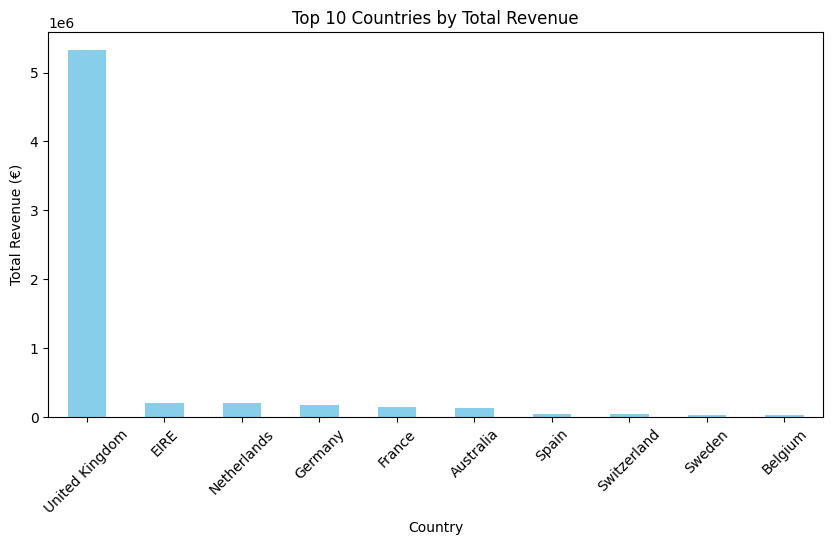

In [9]:
import matplotlib.pyplot as plt

# Ülkeye göre toplam gelir
revenue_by_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
revenue_by_country.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Revenue')
plt.ylabel('Total Revenue (€)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()


In [8]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 142.1 MB/s eta 0:00:00


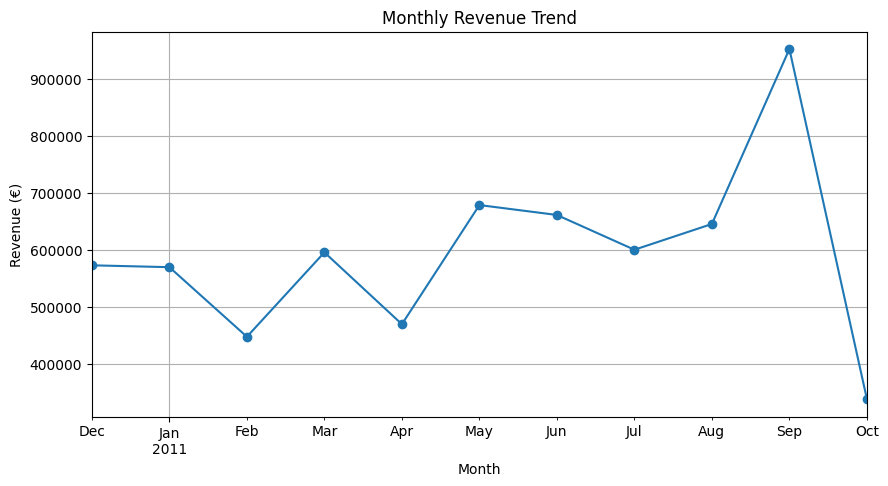

In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

revenue_by_month = df.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(10,5))
revenue_by_month.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue (€)')
plt.xlabel('Month')
plt.grid(True)
plt.show()


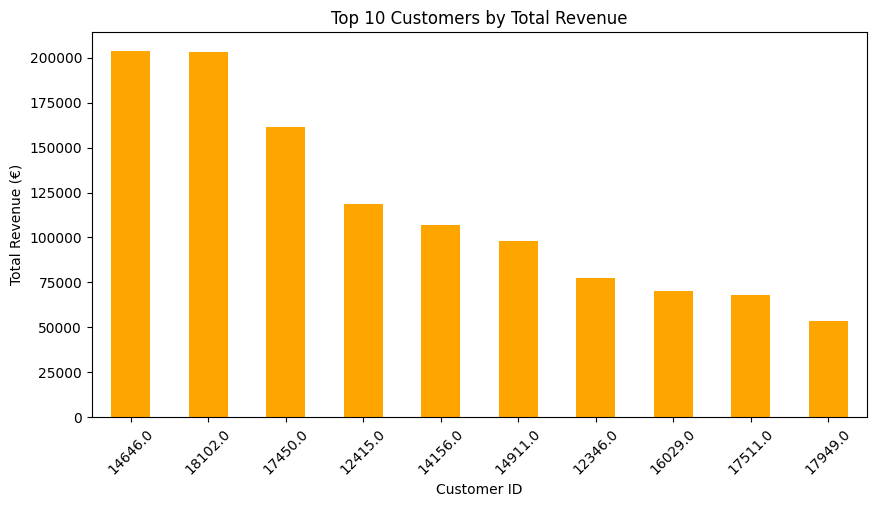

In [11]:
# En çok gelir getiren 10 müşteri
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_customers.plot(kind='bar', color='orange')
plt.title('Top 10 Customers by Total Revenue')
plt.ylabel('Total Revenue (€)')
plt.xlabel('Customer ID')
plt.xticks(rotation=45)
plt.show()


In [12]:
avg_order_value = df['TotalPrice'].mean()
print(f"💰 Average Order Value: €{avg_order_value:.2f}")


💰 Average Order Value: €23.22
